In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/input-data/ml-input-data.csv


## **1. Understand the Problem and Dataset**

In [56]:
import pandas as pd 
import io
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

df = pd.read_csv('/kaggle/input/input-data/ml-input-data.csv')

In [57]:
df

,ad_id,automobile_30_days_visits,automobile_30_days_total_dwell_time,driving_school_30_days_visits,driving_school_30_days_total_dwell_time,automobile_7_days_visits,automobile_7_days_total_dwell_time,driving_school_7_days_visits,driving_school_7_days_total_dwell_time,automobile_14_days_visits,...,Religious_Organizations_visits,Restaurants_and_Other_Eating_Places_total_minimum_dwell,Restaurants_and_Other_Eating_Places_visits,Sporting_Goods_Hobby_and_Musical_Instrument_Stores_total_minimum_dwell,Sporting_Goods_Hobby_and_Musical_Instrument_Stores_visits,Traveler_Accommodation_total_minimum_dwell,Traveler_Accommodation_visits,other_total_minimum_dwell,other_visits,label
0,14785c96e6afa999bad4387b27187ad8adf7260ac2e93b...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,2,0.0,0,0.0,0,0.0,0,0.0,0,0
1,b1dadbb45de4bf53fe337348a8ef40756e9e70e7cd5c66...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,585.0,1,0
2,1617ba1980e9cbef3096a5d8ab5eb1fc934e976767c379...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
3,3518a0365f5714d6908c04382f9d7b2c59f69db8efeb1b...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,89.0,2,0.0,0,0
4,6fa530dfb965bf2ce21957bbc4c7f3f81713b56ebafc0a...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,9.0,2,0.0,0,0.0,0,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798322,6fd5dc06a3aafb3a3c99d2a9e25dc278433332531d72ca...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,728.0,13,16.0,1,0.0,0,492.0,3,1
2798323,a567e95b2fad5fa834427a7f8d32f89dcec4f260cb06bb...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,20.0,2,0.0,0,0.0,0,0.0,0,1
2798324,e099be09a00853fa12e607f87e25ebed0671051ea8a4c8...,2,68.0,0,0.0,1,28.0,0,0.0,2,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
2798325,bba7e2a3a592931f5845255e20cdebaf6e39dfb1030ac9...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,323.0,2,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798327 entries, 0 to 2798326
Data columns (total 54 columns):
 #   Column                                                                                     Dtype  
---  ------                                                                                     -----  
 0   ad_id                                                                                      object 
 1   automobile_30_days_visits                                                                  int64  
 2   automobile_30_days_total_dwell_time                                                        float64
 3   driving_school_30_days_visits                                                              int64  
 4   driving_school_30_days_total_dwell_time                                                    float64
 5   automobile_7_days_visits                                                                   int64  
 6   automobile_7_days_total_dwell_time                

## **2. Data Exploration and Preprocessing**

In [59]:
buffer = io.StringIO()
df.info(buf=buffer)
info = buffer.getvalue()

# Extract the memory usage line
memory_usage_line = [line for line in info.split('\n') if 'memory usage' in line][0]
print(memory_usage_line)

memory usage: 1.1+ GB


### **2.1 Reducing Memory**

In [60]:
import pandas as pd
import numpy as np

# Assuming df is the DataFrame with your dataset

def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type == 'object':
            # Convert object types to category
            df[col] = df[col].astype('category')
        elif col_type == 'int64':
            # Downcast integers
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            else:
                df[col] = pd.to_numeric(df[col], downcast='signed')
        elif col_type == 'float64':
            # Downcast floats
            df[col] = pd.to_numeric(df[col], downcast='float')

    return df

# Optimize the DataFrame
df_optimized = optimize_dataframe(df)

In [61]:
buffer = io.StringIO()
df_optimized.info(buf=buffer)
info = buffer.getvalue()

# Extract the memory usage line
memory_usage_line = [line for line in info.split('\n') if 'memory usage' in line][0]
print(memory_usage_line)
# reducing memory 

memory usage: 448.8 MB


### **2.2 Checking For Missing Data**

In [62]:
# checking for missing values 
def missing_values_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    
    # Sort the percentages in descending order
    missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
    
    return missing_percentage_sorted

# Assuming df is your DataFrame
missing_percentage = missing_values_percentage(df)
print(missing_percentage)
## looking at the results i see no missing values 

ad_id                                                                                        0.0
Other_Miscellaneous_Manufacturing_visits                                                     0.0
General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_total_minimum_dwell    0.0
General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_visits                 0.0
Grocery_Stores_total_minimum_dwell                                                           0.0
Grocery_Stores_visits                                                                        0.0
Health_and_Personal_Care_Stores_total_minimum_dwell                                          0.0
Health_and_Personal_Care_Stores_visits                                                       0.0
Museums_Historical_Sites_and_Similar_Institutions_total_minimum_dwell                        0.0
Museums_Historical_Sites_and_Similar_Institutions_visits                                     0.0
Other_Amusement_and_Recreation

### **2.3 Calculating Ranges for Data**

In [63]:
def column_ranges(df):
    # Initialize an empty dictionary to store the ranges
    ranges = {}

    # Iterate through each column in the DataFrame
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate the range of the numeric column
            min_value = df[column].min()
            max_value = df[column].max()
            range_value = max_value - min_value
            ranges[column] = (min_value, max_value, range_value)
        else:
            # For non-numeric columns, store additional information
            unique_count = df[column].nunique()
            ranges[column] = (None, None, unique_count)

    # Convert the dictionary to a DataFrame for better visualization
    ranges_df = pd.DataFrame.from_dict(ranges, orient='index', columns=['Min', 'Max', 'Range/Unique Count'])
    
    return ranges_df
ranges_df = column_ranges(df_optimized)

In [64]:
ranges_df

,Min,Max,Range/Unique Count
ad_id,NaN,NaN,2798327.0
automobile_30_days_visits,0.0,61.0,61.0
automobile_30_days_total_dwell_time,0.0,28887.0,28887.0
driving_school_30_days_visits,0.0,18.0,18.0
driving_school_30_days_total_dwell_time,0.0,6908.0,6908.0
automobile_7_days_visits,0.0,15.0,15.0
automobile_7_days_total_dwell_time,0.0,8414.0,8414.0
driving_school_7_days_visits,0.0,3.0,3.0
driving_school_7_days_total_dwell_time,0.0,2207.0,2207.0
automobile_14_days_visits,0.0,28.0,28.0


Large Range Differences: Columns like Museums_Historical_Sites_and_Similar_Institutions_total_minimum_dwell have a range of 43044.0, while driving_school_30_days_visits has a range of only 18. This large disparity suggests that normalization could help in ensuring that all features contribute equally to the model, particularly if you are using algorithms sensitive to feature scales (e.g., gradient descent-based algorithms).

Column Ranges:

Small Ranges: Columns like driving_school_7_days_visits with a range of 3, and driving_school_30_days_visits with a range of 18 are relatively small.

### **2.4 Understanding Correlations among Data**

In [65]:
correlations = df_optimized.drop('ad_id', axis=1).corrwith(df_optimized['label']).abs().sort_values(ascending=False)
print("Feature Correlations with Target:")
print(correlations)

Feature Correlations with Target:
label                                                                                        1.000000
Automobile_Dealers_visits                                                                    0.195156
automobile_30_days_visits                                                                    0.195156
automobile_14_days_visits                                                                    0.181548
automobile_7_days_visits                                                                     0.165194
Automobile_Dealers_total_minimum_dwell                                                       0.084879
automobile_30_days_total_dwell_time                                                          0.084879
automobile_14_days_total_dwell_time                                                          0.082715
automobile_7_days_total_dwell_time                                                           0.075097
Gasoline_Stations_visits                        

In [66]:
# Calculate the correlation matrix
correlation_matrix = df_optimized.drop(columns=['label','ad_id']).corr().abs()
# Set the correlation threshold
threshold = 0.7

# Identify pairs of features with correlation higher than the threshold
high_correlation_pairs = np.where(correlation_matrix > threshold)
high_correlation_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_correlation_pairs) if x != y and x < y]

# Display the highly correlated pairs
print("Highly Correlated Feature Pairs:")
for pair in high_correlation_pairs:
    print(pair)

Highly Correlated Feature Pairs:
('automobile_30_days_visits', 'automobile_7_days_visits')
('automobile_30_days_visits', 'automobile_14_days_visits')
('automobile_30_days_visits', 'Automobile_Dealers_visits')
('automobile_30_days_total_dwell_time', 'automobile_7_days_total_dwell_time')
('automobile_30_days_total_dwell_time', 'automobile_14_days_total_dwell_time')
('automobile_30_days_total_dwell_time', 'Automobile_Dealers_total_minimum_dwell')
('driving_school_30_days_visits', 'driving_school_30_days_total_dwell_time')
('driving_school_30_days_visits', 'driving_school_14_days_visits')
('driving_school_30_days_total_dwell_time', 'driving_school_14_days_total_dwell_time')
('automobile_7_days_visits', 'automobile_14_days_visits')
('automobile_7_days_visits', 'Automobile_Dealers_visits')
('automobile_7_days_total_dwell_time', 'automobile_14_days_total_dwell_time')
('automobile_7_days_total_dwell_time', 'Automobile_Dealers_total_minimum_dwell')
('driving_school_7_days_visits', 'driving_scho

In [67]:
# lets us remove these highly co related features, important to note that  we want to keep the ones with more days 
# for instance keeping _30 days is more valubale than _7 or _14 
features_to_remove = set(['automobile_7_days_visits','automobile_14_days_visits', 'Automobile_Dealers_visits',
 'automobile_7_days_total_dwell_time',  'automobile_14_days_total_dwell_time', 'Automobile_Dealers_total_minimum_dwell',
'driving_school_30_days_total_dwell_time','driving_school_14_days_visits','driving_school_14_days_total_dwell_time',
  'Traveler_Accommodation_total_minimum_dwell','Religious_Organizations_total_minimum_dwell','Other_Miscellaneous_Manufacturing_total_minimum_dwell' ,
'Museums_Historical_Sites_and_Similar_Institutions_total_minimum_dwell','Electronics_and_Appliance_Stores_total_minimum_dwell',
 'Colleges_Universities_and_Professional_Schools_total_minimum_dwell', 'Building_Finishing_Contractors_total_minimum_dwell',
             'Building_Equipment_Contractors_total_minimum_dwell', 'driving_school_14_days_total_dwell_time'
                         ]
                        )
features_to_remove = list(features_to_remove)
features_to_remove = features_to_remove

In [68]:
features_to_remove

['driving_school_30_days_total_dwell_time',
 'Traveler_Accommodation_total_minimum_dwell',
 'Other_Miscellaneous_Manufacturing_total_minimum_dwell',
 'Automobile_Dealers_visits',
 'Religious_Organizations_total_minimum_dwell',
 'Building_Finishing_Contractors_total_minimum_dwell',
 'Building_Equipment_Contractors_total_minimum_dwell',
 'automobile_14_days_visits',
 'driving_school_14_days_total_dwell_time',
 'Electronics_and_Appliance_Stores_total_minimum_dwell',
 'Automobile_Dealers_total_minimum_dwell',
 'Colleges_Universities_and_Professional_Schools_total_minimum_dwell',
 'automobile_14_days_total_dwell_time',
 'Museums_Historical_Sites_and_Similar_Institutions_total_minimum_dwell',
 'automobile_7_days_total_dwell_time',
 'automobile_7_days_visits',
 'driving_school_14_days_visits']

### **2.5 Reducing features**

In [69]:
# Define the target column
target_column = 'label'

# Stratified split to maintain class distribution
_, stratified_sample = train_test_split(df_optimized.drop(columns=features_to_remove), test_size=600000, stratify=df_optimized[target_column])

# Verify the class distribution in the stratified sample
class_distribution = stratified_sample[target_column].value_counts(normalize=True)
print(class_distribution)

label
0    0.989962
1    0.010038
Name: proportion, dtype: float64


In [70]:
stratified_sample

,ad_id,automobile_30_days_visits,automobile_30_days_total_dwell_time,driving_school_30_days_visits,driving_school_7_days_visits,driving_school_7_days_total_dwell_time,Building_Equipment_Contractors_visits,Building_Finishing_Contractors_visits,Building_Material_and_Supplies_Dealers_total_minimum_dwell,Building_Material_and_Supplies_Dealers_visits,...,Other_Miscellaneous_Store_Retailers_visits,Religious_Organizations_visits,Restaurants_and_Other_Eating_Places_total_minimum_dwell,Restaurants_and_Other_Eating_Places_visits,Sporting_Goods_Hobby_and_Musical_Instrument_Stores_total_minimum_dwell,Sporting_Goods_Hobby_and_Musical_Instrument_Stores_visits,Traveler_Accommodation_visits,other_total_minimum_dwell,other_visits,label
333653,1ae6735c01688aa926bcb296d211f8b5b0919286a63c58...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,31.0,1,0.0,0,0,104.0,1,0
922536,af96001760f4420e6eec2e929ee219b297f460047065a2...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,7.0,1,0.0,0,3,0.0,0,0
2019474,c2899c062d32900900c88b3dc0b2ac06d470c7b606a855...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,0.0,0,0.0,0,0,181.0,2,0
2173173,582c176880698064a8558315c2f23b0295797e502ae4a9...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,0.0,0,0.0,0,0,0.0,0,0
2152151,2a5659145b29894f8ef06adff63305e917ef7a0b4bb31b...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,151.0,4,0.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506680,43fc786281bfdf60e6e643b1139c9fdc4fd65604c226de...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,0.0,0,0.0,0,0,56.0,2,0
1523202,8bbd7457603d1d2ad78eff1c47105561a2a691576678fc...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,0.0,0,0.0,0,0,261.0,1,0
1029118,63359c3e1f87a0eeba075cbda4b99fa57293679f3a5365...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,0.0,0,0.0,0,0,53.0,1,0
2588184,d56c31b5938e4babb224013e9ef5b87051339c265e0cf9...,0,0.0,0,0,0.0,0,0,0.0,0,...,0,0,287.0,1,0.0,0,0,0.0,0,0


In [71]:
#from sklearn.feature_selection import mutual_info_classif

# Drop the target column from the features
X = stratified_sample.drop(columns=['label','ad_id' ])
y = stratified_sample['label']

from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances from Random Forest:")
print(feature_importances)

Feature Importances from Random Forest:
automobile_30_days_total_dwell_time                                                          0.187718
other_total_minimum_dwell                                                                    0.166763
Restaurants_and_Other_Eating_Places_total_minimum_dwell                                      0.111176
automobile_30_days_visits                                                                    0.062176
Other_Amusement_and_Recreation_Industries_total_minimum_dwell                                0.049422
Gasoline_Stations_total_minimum_dwell                                                        0.046281
other_visits                                                                                 0.038862
Grocery_Stores_total_minimum_dwell                                                           0.030642
Restaurants_and_Other_Eating_Places_visits                                                   0.027027
General_Merchandise_Stores_including_Wareh

In [72]:
filtered_features = feature_importances[feature_importances > 0.01]
filtered_feature_list_decsion_tree = filtered_features.index.tolist()
print("List of Filtered Features:")
print(filtered_feature_list_decsion_tree)

List of Filtered Features:
['automobile_30_days_total_dwell_time', 'other_total_minimum_dwell', 'Restaurants_and_Other_Eating_Places_total_minimum_dwell', 'automobile_30_days_visits', 'Other_Amusement_and_Recreation_Industries_total_minimum_dwell', 'Gasoline_Stations_total_minimum_dwell', 'other_visits', 'Grocery_Stores_total_minimum_dwell', 'Restaurants_and_Other_Eating_Places_visits', 'General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_total_minimum_dwell', 'Museums_Historical_Sites_and_Similar_Institutions_visits', 'Other_Miscellaneous_Store_Retailers_total_minimum_dwell', 'Building_Material_and_Supplies_Dealers_total_minimum_dwell', 'Traveler_Accommodation_visits', 'Health_and_Personal_Care_Stores_total_minimum_dwell', 'Other_Amusement_and_Recreation_Industries_visits', 'Sporting_Goods_Hobby_and_Musical_Instrument_Stores_total_minimum_dwell', 'Religious_Organizations_visits', 'Drinking_Places_Alcoholic_Beverages__total_minimum_dwell', 'Gasoline_Stations_visits', 

In [73]:

# # Define the features and target
# X = stratified_sample.drop(columns=[target_column])
# y = stratified_sample[target_column]

# Scale the features and apply L1 regularization
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
])

# Fit the model
pipeline.fit(X, y)

# Get the coefficients
coefficients = pipeline.named_steps['logistic'].coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Display the non-zero features
important_features = feature_importance[feature_importance['Importance'] != 0]
print(important_features)

                                              Feature  Importance
0                           automobile_30_days_visits    0.466399
11        Drinking_Places_Alcoholic_Beverages__visits    0.044727
34                                       other_visits    0.037016
18                              Grocery_Stores_visits    0.027559
23   Other_Amusement_and_Recreation_Industries_visits    0.027496
16  General_Merchandise_Stores_including_Warehouse...    0.021815
25  Other_Miscellaneous_Store_Retailers_total_mini...    0.019758
8       Building_Material_and_Supplies_Dealers_visits    0.018131
31  Sporting_Goods_Hobby_and_Musical_Instrument_St...    0.017606
14                           Gasoline_Stations_visits    0.010997
29         Restaurants_and_Other_Eating_Places_visits    0.010328
20             Health_and_Personal_Care_Stores_visits    0.009847
24           Other_Miscellaneous_Manufacturing_visits    0.008907
2                       driving_school_30_days_visits    0.008072
13        

In [74]:
# Sort features by importance in descending order
sorted_features = important_features.sort_values(by='Importance', ascending=False)

# Get the top 10 most positively influential features
top_10_positive = sorted_features.head(10)['Feature'].tolist()

# Get the top 6 most negatively influential features
top_6_negative = sorted_features.tail(6)['Feature'].tolist()

combined_features_l1_reg = top_10_positive + top_6_negative

print("Combined Features List:")
print(combined_features_l1_reg)

Combined Features List:
['automobile_30_days_visits', 'Drinking_Places_Alcoholic_Beverages__visits', 'other_visits', 'Grocery_Stores_visits', 'Other_Amusement_and_Recreation_Industries_visits', 'General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_visits', 'Other_Miscellaneous_Store_Retailers_total_minimum_dwell', 'Building_Material_and_Supplies_Dealers_visits', 'Sporting_Goods_Hobby_and_Musical_Instrument_Stores_visits', 'Gasoline_Stations_visits', 'Museums_Historical_Sites_and_Similar_Institutions_visits', 'other_total_minimum_dwell', 'Other_Miscellaneous_Store_Retailers_visits', 'driving_school_7_days_visits', 'Drinking_Places_Alcoholic_Beverages__total_minimum_dwell', 'automobile_30_days_total_dwell_time']


In [75]:
selected_features = list(set(combined_features_l1_reg + filtered_feature_list_decsion_tree))

In [76]:
selected_features

['Other_Amusement_and_Recreation_Industries_visits',
 'Building_Material_and_Supplies_Dealers_visits',
 'Restaurants_and_Other_Eating_Places_total_minimum_dwell',
 'General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_total_minimum_dwell',
 'other_total_minimum_dwell',
 'Gasoline_Stations_total_minimum_dwell',
 'automobile_30_days_total_dwell_time',
 'Drinking_Places_Alcoholic_Beverages__total_minimum_dwell',
 'Drinking_Places_Alcoholic_Beverages__visits',
 'Museums_Historical_Sites_and_Similar_Institutions_visits',
 'Other_Miscellaneous_Manufacturing_visits',
 'automobile_30_days_visits',
 'General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_visits',
 'Restaurants_and_Other_Eating_Places_visits',
 'Other_Miscellaneous_Store_Retailers_visits',
 'Sporting_Goods_Hobby_and_Musical_Instrument_Stores_visits',
 'Sporting_Goods_Hobby_and_Musical_Instrument_Stores_total_minimum_dwell',
 'Building_Material_and_Supplies_Dealers_total_minimum_dwell',
 'Religious

In [77]:
df_optimized

,ad_id,automobile_30_days_visits,automobile_30_days_total_dwell_time,driving_school_30_days_visits,driving_school_30_days_total_dwell_time,automobile_7_days_visits,automobile_7_days_total_dwell_time,driving_school_7_days_visits,driving_school_7_days_total_dwell_time,automobile_14_days_visits,...,Religious_Organizations_visits,Restaurants_and_Other_Eating_Places_total_minimum_dwell,Restaurants_and_Other_Eating_Places_visits,Sporting_Goods_Hobby_and_Musical_Instrument_Stores_total_minimum_dwell,Sporting_Goods_Hobby_and_Musical_Instrument_Stores_visits,Traveler_Accommodation_total_minimum_dwell,Traveler_Accommodation_visits,other_total_minimum_dwell,other_visits,label
0,14785c96e6afa999bad4387b27187ad8adf7260ac2e93b...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,2,0.0,0,0.0,0,0.0,0,0.0,0,0
1,b1dadbb45de4bf53fe337348a8ef40756e9e70e7cd5c66...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,585.0,1,0
2,1617ba1980e9cbef3096a5d8ab5eb1fc934e976767c379...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
3,3518a0365f5714d6908c04382f9d7b2c59f69db8efeb1b...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,89.0,2,0.0,0,0
4,6fa530dfb965bf2ce21957bbc4c7f3f81713b56ebafc0a...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,9.0,2,0.0,0,0.0,0,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798322,6fd5dc06a3aafb3a3c99d2a9e25dc278433332531d72ca...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,728.0,13,16.0,1,0.0,0,492.0,3,1
2798323,a567e95b2fad5fa834427a7f8d32f89dcec4f260cb06bb...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,20.0,2,0.0,0,0.0,0,0.0,0,1
2798324,e099be09a00853fa12e607f87e25ebed0671051ea8a4c8...,2,68.0,0,0.0,1,28.0,0,0.0,2,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
2798325,bba7e2a3a592931f5845255e20cdebaf6e39dfb1030ac9...,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,323.0,2,1


### **2.6 Feature Engineering**

In [78]:
# Create interaction features with updated names
df_optimized['automobile_visits_inter'] = df_optimized['automobile_30_days_visits'] * df_optimized['automobile_30_days_total_dwell_time']
df_optimized['driving_school_visits_inter'] = df_optimized['driving_school_7_days_total_dwell_time'] * df_optimized['driving_school_30_days_visits']
df_optimized['grocery_visits_inter'] = df_optimized['Grocery_Stores_visits'] * df_optimized['Grocery_Stores_total_minimum_dwell']
df_optimized['restaurants_visits_inter'] = df_optimized['Restaurants_and_Other_Eating_Places_visits'] * df_optimized['Restaurants_and_Other_Eating_Places_total_minimum_dwell']
df_optimized['amusement_visits_inter'] = df_optimized['Other_Amusement_and_Recreation_Industries_visits'] * df_optimized['Other_Amusement_and_Recreation_Industries_total_minimum_dwell']
df_optimized['merchandise_visits_inter'] = df_optimized['General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_visits'] * df_optimized['General_Merchandise_Stores_including_Warehouse_Clubs_and_Supercenters_total_minimum_dwell']
df_optimized['gasoline_visits_inter'] = df_optimized['Gasoline_Stations_visits'] * df_optimized['Gasoline_Stations_total_minimum_dwell']
df_optimized['drinking_religious_inter'] = df_optimized['Drinking_Places_Alcoholic_Beverages__total_minimum_dwell'] * df_optimized['Religious_Organizations_visits']
df_optimized['building_inter'] = df_optimized['Building_Material_and_Supplies_Dealers_total_minimum_dwell'] * df_optimized['Building_Equipment_Contractors_visits']
df_optimized['tourism_inter'] = df_optimized['Museums_Historical_Sites_and_Similar_Institutions_visits'] * df_optimized['Traveler_Accommodation_visits']
df_optimized['other_visits_inter'] = df_optimized['other_visits'] * df_optimized['other_total_minimum_dwell']
df_optimized['health_misc_inter'] = df_optimized['Health_and_Personal_Care_Stores_total_minimum_dwell'] * df_optimized['Other_Miscellaneous_Store_Retailers_total_minimum_dwell']

# Keep ad_id and label columns
columns_to_keep = ['ad_id', 'label', 'automobile_visits_inter', 'driving_school_visits_inter', 'grocery_visits_inter',
                   'restaurants_visits_inter', 'amusement_visits_inter', 'merchandise_visits_inter',
                   'gasoline_visits_inter', 'drinking_religious_inter', 'building_inter',
                   'tourism_inter', 'other_visits_inter', 'health_misc_inter']

df_final = df_optimized[columns_to_keep]

## **3 Model Selection**

In [79]:
# Assuming 'ad_id' and 'label' are already separated
X = df_final.drop(columns=['ad_id', 'label'])
y = df_final['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.9, random_state=42, stratify=y_train)

# Now you have X_train, X_val for model training and validation, and X_test, y_test for final evaluation


In [33]:
# List of classifiers to evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    #'SVM': SVC(class_weight='balanced', random_state=42, probability=True),
    'K-Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    #'Naive Bayes': GaussianNB()
}

# Scorer
recall_scorer = make_scorer(recall_score)

# Results storage
results = {}

# Evaluate each classifier
for name, clf in classifiers.items():
    pipeline = make_pipeline(StandardScaler(), SMOTE(random_state=42), clf)
    print('hit_1')
    scores = cross_val_score(pipeline, X_train, y_train, cv=2, scoring=recall_scorer)
    results[name] = scores
    print(f"{name} Recall Scores: {scores}")
    print(f"{name} Mean Recall: {scores.mean()}")

# Print summary
best_model = max(results, key=lambda k: results[k].mean())
print(f"Best Model: {best_model} with Mean Recall: {results[best_model].mean()}")

hit_1
Random Forest Recall Scores: [0.21835443 0.21914557]
Random Forest Mean Recall: 0.21875
hit_1
Logistic Regression Recall Scores: [0.30142405 0.30221519]
Logistic Regression Mean Recall: 0.30181962025316456
hit_1
K-Neighbors Recall Scores: [0.28006329 0.28876582]
K-Neighbors Mean Recall: 0.28441455696202533
hit_1
Decision Tree Recall Scores: [0.20332278 0.16613924]
Decision Tree Mean Recall: 0.18473101265822783
Best Model: Logistic Regression with Mean Recall: 0.30181962025316456


## **4 Hyperparameter Tuning**

In [80]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

best_recall = 0
best_params = {}
best_model = None

# Perform grid search manually on the training and validation data
for C in param_grid['C']:
    for solver in param_grid['solver']:
        pipeline = make_pipeline(
            StandardScaler(), 
            SMOTE(random_state=42), 
            LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, C=C, solver=solver)
        )
        pipeline.fit(X_train, y_train)  # Train on the training data
        
        y_val_pred = pipeline.predict(X_val)  # Predict on the validation data
        recall = recall_score(y_val, y_val_pred)  # Calculate recall
        
        if recall > best_recall:
            best_recall = recall
            best_params = {'C': C, 'solver': solver}
            best_model = pipeline

print("Best parameters:", best_params)
print("Best recall score on validation data:", best_recall)

# Retrain the best model on the combined training and validation set
pipeline = make_pipeline(
    StandardScaler(), 
    SMOTE(random_state=42), 
    LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, **best_params)
)
pipeline.fit(X_train, y_train)  # Retrain on the training data

# Evaluate the best model on the test set
y_test_pred = pipeline.predict(X_test)
test_recall = recall_score(y_test, y_test_pred)

print("Recall score on test data:", test_recall)

Best parameters: {'C': 1, 'solver': 'lbfgs'}
Best recall score on validation data: 0.3034018987341772
Recall score on test data: 0.30331078675685297


## **5 Inference**

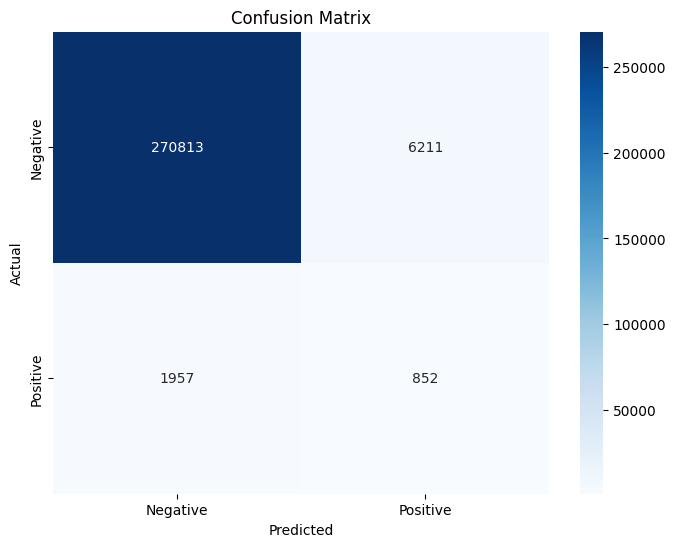

In [81]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Observation1
Recall (or True Positive Rate)
The recall of approximately 30% indicates that the model is only identifying 30% of the actual potential car buyers. This means the model is missing a significant portion of users who are actually potential car buyers.

Observation2
Precision (or Positive Predictive Value)
The precision of about 12% shows that when the model predicts a user is a potential car buyer, it is only correct about 12% of the time. This suggests that the model’s positive predictions are not very reliable, leading to many false positives where users predicted as potential buyers are not actually buyers.

Observation3
False Positive Rate (FPR)
The low FPR indicates that the model is effective at avoiding false positives, meaning it rarely incorrectly classifies non-buyers as buyers.

Observation4
False Negative Rate (FNR)
The high FNR of about 70% suggests that the model is failing to identify a large proportion of actual potential car buyers. This means many potential car buyers are being missed by the model, which is crucial for improving targeting and marketing strategies.

## **6 Final Conclusion**

The model performs well at identifying non-car buyers but struggles with accurately identifying potential car buyers, as evidenced by low recall and precision. This makes it suitable for applications where avoiding false positives is critical, such as filtering out non-buyers. However, it is not suitable for scenarios requiring high accuracy in identifying actual buyers, as it misses a significant number of potential car buyers